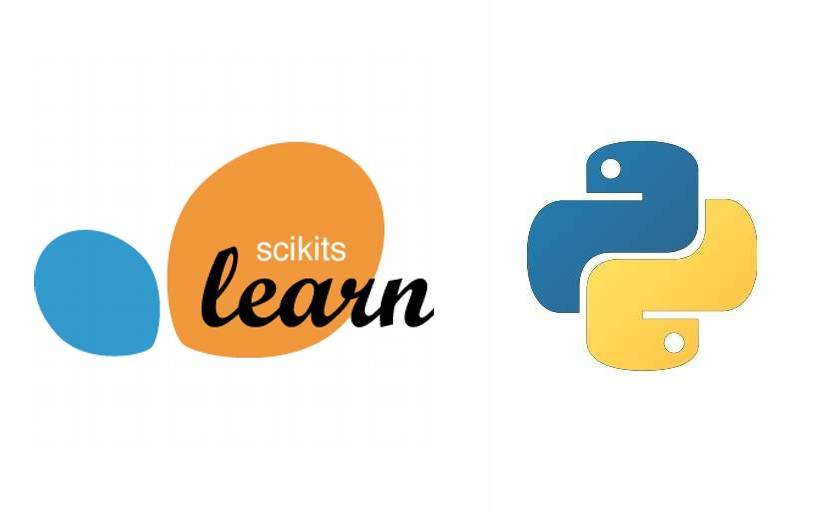

# BID01 - Pengenalan Data Science

Nama: Angelique Keyko Haryono

NRP: 2073016

### Week 13 - Classification dengan Decision Tree

1. Konsep Dasar Decision Tree
2. Gini Impurity
3. Information Gain
4. Membangun Decision Tree
5. Dataset
6. Classification dengan `DecisionTreeClassifier`
7. Visualisasi Model
8. Evaluasi Model

Decision Tree merupakan salah satu model machine learning yang banyak diterapkan di classification task. Decision tree merupakan metode klasifikasi yang menerapkan struktur pohon. Berikut link referensi yang bisa digunakan:
https://en.wikipedia.org/wiki/Decision_tree_learning

#### Konsep Dasar Decision Tree

Terminology: Root Node, Internal Node, Leaf Node
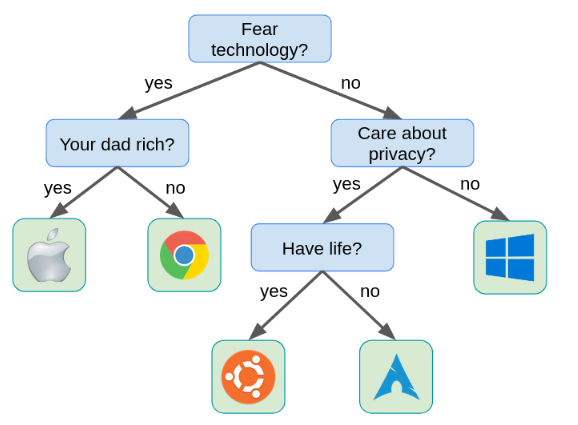

Gambar diatas merupakan contoh decision tree. Dalam decision tree, tiap nodenya akan memiliki 2 cabang. Komponen dalam decision tree adalah:
- Root Node (Akar) adalah node yang terletak di posisi paling atas. 
- Leaf Node (Daun) adalah sejumlah node yang terletak di ujung bawah. Setiap leaf akan merepresentasikan prediksi class yang akan dihasilkan oleh struktur tree tersebut. 
- Internal Node (Node) adalah sejumlah node yang berada di antara root dan leaf. 

Dalam machine learning, terdapat beberapa decision tree algorithm. Yang akan dipelajari adalah:
- Classification and Regression Tree (CART)
- ID3
- C4.5
- C5.0

#### Gini Impurity

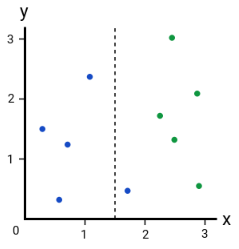

Gini Impurity biasa disebut juga dengan pengukuran ketidakmurnian. Gini impurity adalah impurity measure yang diterapkan pada algoritma chart. Gini impuruty memiliki jangkauan nilai antara 0 sampai 1. 0 mengindikasikan nilai murni yang sempurna. 1 merepresentasikan nilai paling tidak murni / nilai paling tinggi. 

Diatas terdapat contoh studi kasus dimana ada 2 class yaitu biru dan hijau. Akan dilakukan split atau pemisahan sehingga ada 2 ruas yaitu kiri dan kanan. 

- Ruas Kiri:
$ G = 1 - \sum \limits _{i} ^{n} P^2_{i} $

$ = 1 - P(biru)^2$

$ = 1 - (\frac {4}{4})^2$

$ = 0$

- Ruas Kanan:
$ G = 1 - \sum \limits _{i} ^{n} P^2_{i} $

$ = 1 - (P(biru)^2 + P(hijau)^2)$

$ = 1 - ((\frac {1}{6})^2 + (\frac {5}{6})^2)$

$ = 0.258$

- Average Gini Impurity:

$ G = \frac {4} {4 + 6} \times 0 + \frac {6} {4 + 6} \times 0.278$

$ = 0.1668$

#### Information Gain

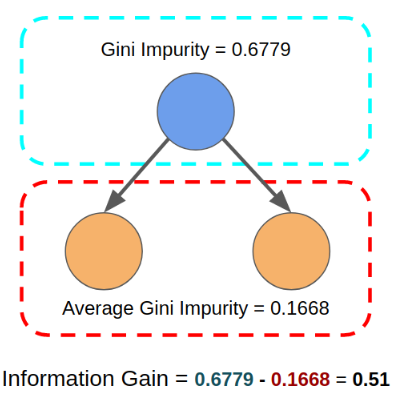

Information Gain bisa diperoleh dengan mengurangi nilai Gini Impurity sebelum dilakukan splitting dengan nilai rata-rata Gini Impurity setelah dilakukan splitting.

#### Membangun Decision Tree

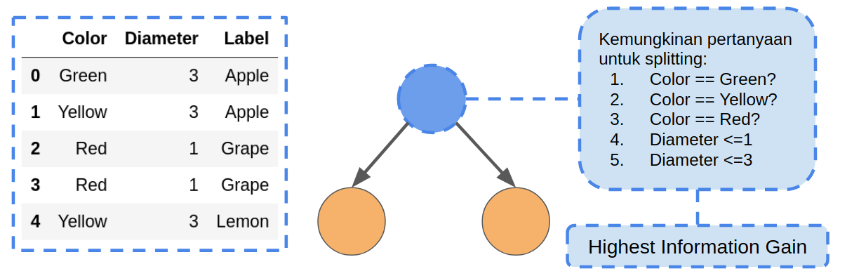

Diatas terdapat contoh studi kasus. Kolom color dan diameter akan berperan sebagai features. Kolom label akan berperan sebagai target label. Kita akan memilih kemungkinan untuk splitting berdasarkan nilai information gain tertinggi. Yang harus dilakukan adalah:
- Menghitung nilai gini impurity dari sekumpulan data sebelum dilakukan splitting.

$ = 1 - (P(apple)^2 + P(grape)^2 + P(lemon)^2)$

$ = 1 - ((\frac {2}{5})^2 + (\frac {2}{5})^2 + (\frac {1}{5})^2)$

$ = 0.63$

- Melakukan splitting data dengan menerapkan semua kemungkinan pertanyaan yang ada satu per satu.
- Menghitung nilai rata-rata gini impurity.
- Menghitung nilai information gain.

#### Dataset

Kita akan menyiapkan iris dataset. Berikut link referensi untuk iris dataset:
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
# import modul load_iris
from sklearn.datasets import load_iris

# memanggil load_iris dan menyertakan parameter
X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


Disini kita akan membagi dataset ini menjadi training dan testing set.

In [5]:
# import modul train_test_split
from sklearn.model_selection import train_test_split

# memanggil train_test_split dan menyertakan parameter
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

#### Classification dengan `DecisionTreeClassifier`

Kita akan menerapkan decision tree untuk melakukan klasifikasi spesies iris. Dibawah akan disertakan parameter `max_depth=4` yang artinya `DecisionTreeClasifier` yang dihasilkan memiliki kedalaman maximum 4 layer.

In [6]:
# import modul DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# membentuk object dari class DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)

# melakukan training dengan method fit
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### Visualisasi Model

Kita bisa memvisualisasikan train model yang dihasilkan dalam decision tree.

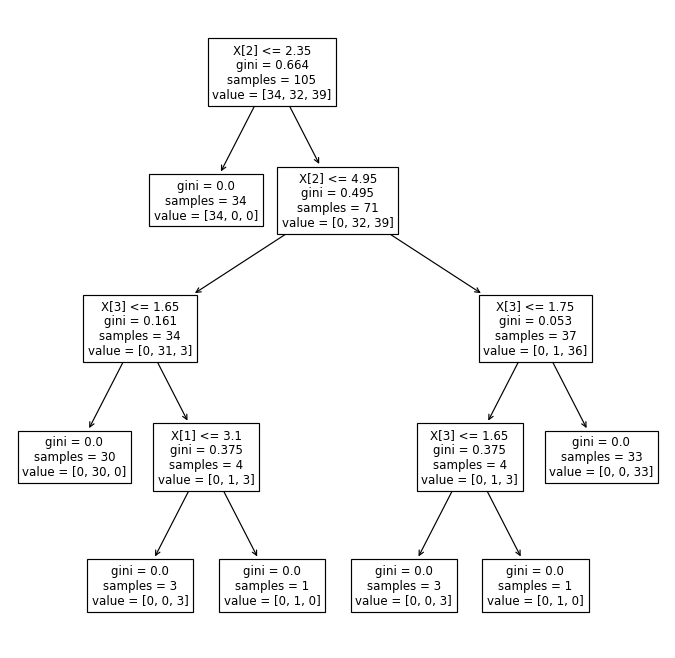

In [8]:
# import modul matplotlib.pyplot dan modul tree
import matplotlib.pyplot as plt
from sklearn import tree

# mengatur dpi figure yang akan dihasilkan
plt.rcParams['figure.dpi'] = 85

# menyiapkan figure
plt.subplots(figsize=(10, 10))

# melakukan plotting model decision tree
tree.plot_tree(model, fontsize=10)

# menampilkan hasil
plt.show()

#### Evaluasi Model

Kita akan melakukan evaluasi performa dari model decision tree yang sudah di training dengan memanfaatkan classification report.

In [9]:
# import modul classification_report
from sklearn.metrics import classification_report

# melakukan prediksi dengan memanfaatkan testing set
y_pred = model.predict(X_test)

# melakukan evaluasi dengan menggunakan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

